외국인 매매 동향, 달러 지수, 달러 환율 간 상관관계를 시각화 하는데 있어 외국인 매매 동향의 영향이 뚜렷하게 드러나지 않아 외국인 매매 동향 데이터와 일치하게 모든 데이터를 증감 정보로 재추출하여 두 번째 시각화를 진행

In [6]:
# 1. 파일 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

foreign_data = pd.read_excel('foreign invest.xlsx')
index_data = pd.read_excel('part dollar index.xlsx')
rate_data = pd.read_excel('part dollar rate.xlsx')

foreign = pd.DataFrame(foreign_data) # 2452행
index = pd.DataFrame(index_data).drop(columns = ['달러 인덱스 변동 %']) # 2599행
rate = pd.DataFrame(rate_data) # 2462행

In [7]:
# 2. 행이 가장 적은 foreign 기준으로 10년치 데이터 병합

merge1 = pd.merge(foreign, index, on='날짜', how='inner')

ten_years = pd.merge(merge1, rate, on='날짜', how='inner')

ten_years # 2447행

,날짜,외국인 순매수(10억원),달러 인덱스,환율 증감
0,2015-11-26,81,0.0,0.0
1,2015-11-27,-35,2.2,6.0
2,2015-11-30,-545,1.5,2.5
3,2015-12-01,131,-3.7,-0.5
4,2015-12-02,-287,1.9,5.5
...,...,...,...,...
2442,2025-11-19,-1112,6.8,6.5
2443,2025-11-20,932,-0.7,4.5
2444,2025-11-21,-2950,0.2,-1.2
2445,2025-11-24,-839,-0.4,3.7


In [8]:
# 3. 최근 1년치 데이터 별도 분리

a_year = ten_years[-365:]

a_year # 365행

,날짜,외국인 순매수(10억원),달러 인덱스,환율 증감
2082,2024-05-24,-316,-3.7,2.0
2083,2024-05-27,-77,-1.2,-4.0
2084,2024-05-28,142,0.2,-4.0
2085,2024-05-29,-1093,4.7,8.0
2086,2024-05-30,-739,-3.6,9.0
...,...,...,...,...
2442,2025-11-19,-1112,6.8,6.5
2443,2025-11-20,932,-0.7,4.5
2444,2025-11-21,-2950,0.2,-1.2
2445,2025-11-24,-839,-0.4,3.7


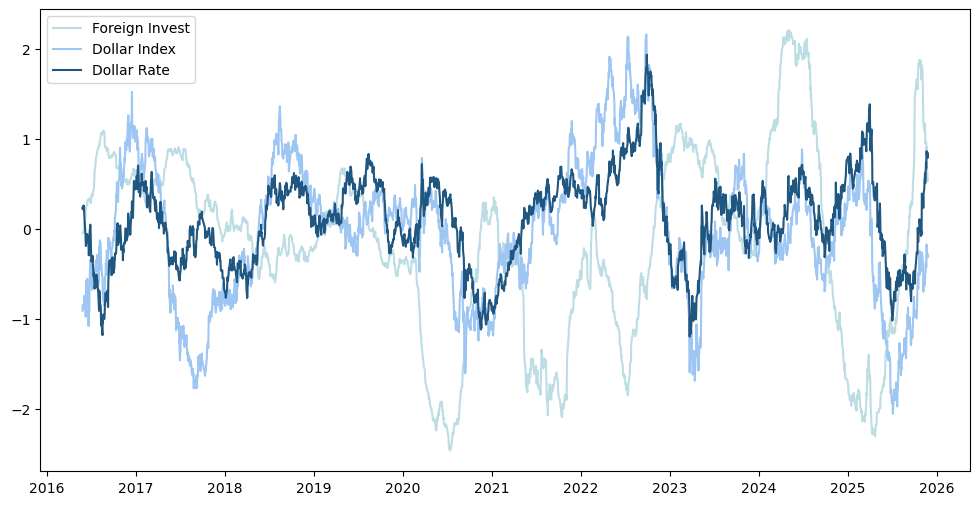

In [9]:
# 4. 세 개 자료 날짜 기준 10년치 선형 그래프 시각화

x = ten_years["날짜"] # X축

raw_y1 = ten_years['외국인 순매수(10억원)']/100
y1 = raw_y1.rolling(window = 120).mean()
y1_shifted = y1.shift(80)

raw_y2 = ten_years['달러 인덱스']*2
y2 = raw_y2.rolling(window = 120).mean()

raw_y3 = ten_years['환율 증감']
y3 = raw_y3.rolling(window = 120).mean()

plt.figure(figsize = (12, 6))

# (1) 메인 그래프 - 외국인 순매수 밀기 전
plt.plot(x, y1, label = 'Foreign Invest', color = '#BDDDE4')
plt.plot(x, y2, label = 'Dollar Index', color = '#9EC6F3')
plt.plot(x, y3, label = 'Dollar Rate', color = '#205781')

# (2) 시각화
plt.legend()
plt.show()


모든 10년치 그래프를 120일 이평선으로 만들고, 아래의 1년치 그래프들은 30일 이평선으로 만들었다.

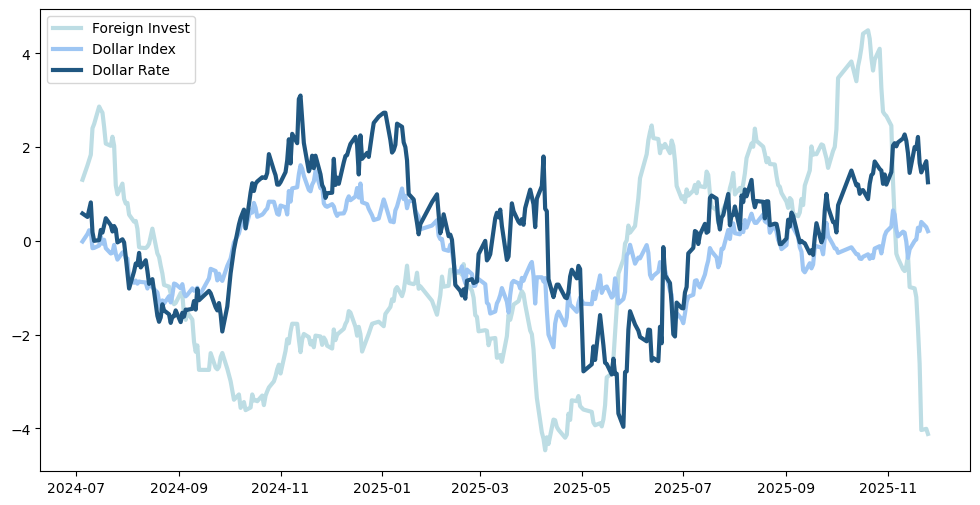

In [10]:
# 4. 세 개 자료 날짜 기준 1년치 선형 그래프 시각화

x2 = a_year["날짜"] # X축

raw_z1 = a_year['외국인 순매수(10억원)']/100
z1 = raw_z1.rolling(window = 30).mean()
z1_shifted = z1.shift(20)

raw_z2 = a_year['달러 인덱스']
z2 = raw_z2.rolling(window = 30).mean()

raw_z3 = a_year['환율 증감']
z3 = raw_z3.rolling(window = 30).mean()

plt.figure(figsize = (12, 6))

# (1) 메인 그래프 - 외국인 순매수 밀기 전
plt.plot(x2, z1, label = 'Foreign Invest', color = '#BDDDE4', linewidth=3)
plt.plot(x2, z2, label = 'Dollar Index', color = '#9EC6F3', linewidth=3)
plt.plot(x2, z3, label = 'Dollar Rate', color = '#205781', linewidth=3)

# (2) 시각화
plt.legend()
plt.show()


결론

0. 달러 인덱스, 외국인 순매수, 원 달러 환율의 상관관계에 대한 결론이다.

1. 단순 추세를 분석한 첫 번째 시각화에서보다 각 데이터의 변동분으로 진행한 2차 분석에서는 외국인 매매 동향이 원 달러 환율에 미치는 영향을 더욱 잘 확인할 수 있다. 완벽하게는 아니나, 외국인 매매 동향이 원 달러 환율에 부적 영향을 미치고 있다고 판단할 수 있으므로, 달러 환율의 방향성을 결정하는 유의미한 변수라고 말 할 수 있다.

2. 1차 시각화의 결론을 적용하여 원/달러 환율이 기본적으로 달러 인덱스와 정의 상관관계를 갖고 있음을 넘어 원 달러 환율이 달러 인덱스에 종속되어 있음을 기본으로 하고, 원/달러 환율과 외국인 순매수가 부의 상관관계를 보일 것이라는 가정에 기반하여, 원/달러 환율이 달러 인덱스의 방향을 무시하고 외국인 순매수와 정의 상관관계를 보이는 비이상적 현상에 집중하였다. 이는 각각 2017년 중반, 2019년 중반에 발생했다.

3. 이러한 현상은 일반적이지 않은 현상으로, 원인을 꼽자면 크게 두 가지를 들 수 있다.
첫째, 달러 자체의 힘과 별개로 한국 내 문제로 인해 원화 약세가 발생했다. 둘째, 외국인은 국내 주식을 순매수한 것보다 국내 투자 자본의 해외 유출이 더욱 컸다.

4. 조사 결과, 2017년에는 삼성전자 주도 하에 반도체 슈퍼 사이클이 발생하여 외국인 매수세가 강렬했으나 북한의 도발이라는 안보상 문제가 발생하여 원화가 약세를 보였다. 2019년에는 미중 무역 갈등이 격화되면서 중국 수출량이 많은 한국의 경제 후퇴가 우려되었고, 일본의 대 한국 수출 규제 정책이 펼쳐지면서 반도체 소재 수급에 문제가 생겨 이러한 우려에 불을 붙이면서 강력한 원화 약세가 촉발되었다.

5. 이러한 원인들은 외국인 순매수와 관계가 있다고 볼 수 없으며, 원화 자체적 문제로 인해 발생한 일시적 우연일 뿐, 이러한 예외적 현상이 외국인 순매수가 원/달러 환율과 부의 상관관계가 있다는 가설을 부정할 수는 없다.

6. 다만, 외국인 순매수가 원 달러 환율과 부의 상관관계가 있다고 말하기 위해서는 외국인 순매수와 달러 인덱스가 서로 역의 관계에 있어야 한다. 원 달러 환율은 기본적으로 달러 인덱스를 추종하므로, 달러 인덱스가 외국인 순매수와 같은 방향으로 움직일 경우(달러도 강세고 외국인도 주식을 살 때), 외국인 수급이 환율에 미치는 영향력은 상쇄되거나 희석될 수 있다는 점을 유의해야 한다.

7. 추가로, 외국인 순매수가 달러 환율에 미치는 영향을 분석하는 과정에서 시차 상관관계가 있는건 아닌지 의문이 들어 아래에 추가로 그래프를 생성하여 분석하고자 한다.

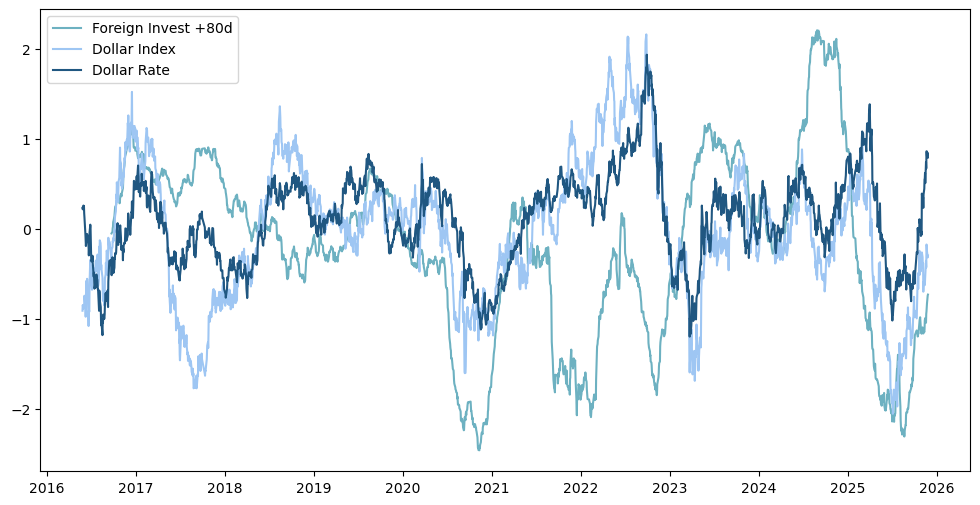

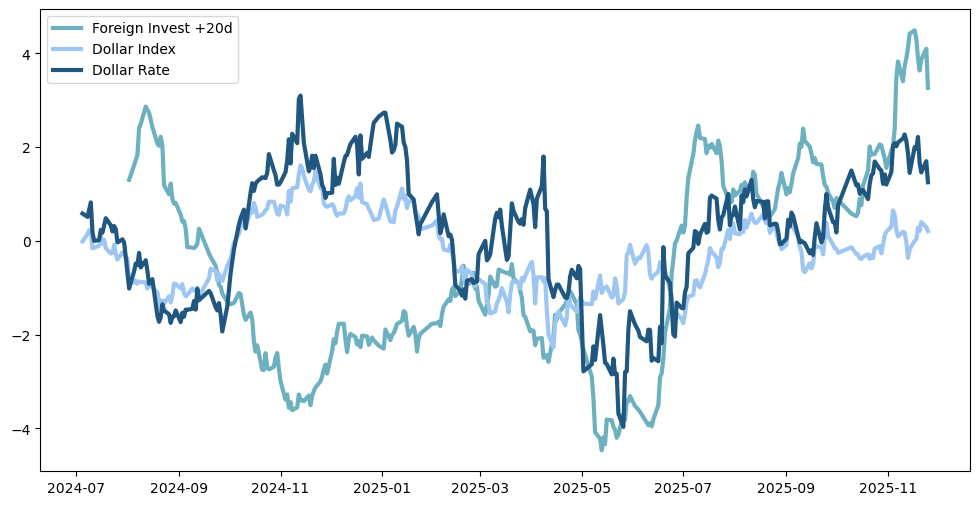

In [11]:
# 5. 10년 그래프

plt.figure(figsize = (12, 6))


# (1) 메인 그래프 - 외국인 순매수 민 후
plt.plot(x, y1_shifted, label = 'Foreign Invest +80d', color = '#6DB1C1')
plt.plot(x, y2, label = 'Dollar Index', color = '#9EC6F3')
plt.plot(x, y3, label = 'Dollar Rate', color = '#205781')

# (2) 시각화
plt.legend()
plt.show()


# 1년 그래프

plt.figure(figsize = (12, 6))


# (1) 메인 그래프 - 외국인 순매수 민 후
plt.plot(x2, z1_shifted, label = 'Foreign Invest +20d', color = "#6DB1C1", linewidth=3)
plt.plot(x2, z2, label = 'Dollar Index', color = '#9EC6F3', linewidth=3)
plt.plot(x2, z3, label = 'Dollar Rate', color = '#205781', linewidth=3)

# (2) 시각화
plt.legend()
plt.show()

10년 외국인 순매수 그래프를 다른 그래프들과 어느 정도 일치하도록 80일 오른쪽으로 이동시켰다.
1년 외국인 순매수 그래프는 20일 오른쪽으로 이동시켰다.

결론

0. 외국인 순매수가 시차를 두고 원 달러 환율에 미치는 영향에 대해 분석하였다.

1. 외국인의 한국 주식 매도 및 매수가 원에서 달러로의 즉각적인 환전으로 이어지지는 않기 때문에 반드시 외국인 매매 동향이 원 달러 환율에 영향을 준다고는 할 수 없다는 생각이 들었기 때문이다.

2. 시차를 둔 그래프도 기본적으로 원 달러 환율과의 부의 상관관계가 잘 보이나, 시차를 두지 않은 그래프와의 차별성을 파악하기는 어렵다.

3. 따라서 외국인 순매수가 시차를 두고 원 달러 환율에 영향을 미친다고 보기 보다는, 각각 80일과 20일의 시차를 두고도 시차를 두지 않은 그래프와 비슷하게 판단 가능한 것으로 보아 외국인 순매수가 원 달러 환율에 미치는 영향은 경향성을 가진다고 판단하는 것이 옳을 것으로 사료된다.

In [ ]:
import pandas as pd 

# 2. 이름표 정리
merge1 = pd.merge(foreign_data, index_data, on='날짜', how='inner')
ten_years = pd.merge(merge1, rate_data, on='날짜', how='inner')

# 3. 상관계수 바로 출력
print("--- [상관계수 결과] ---")
print(ten_years[['외국인 순매수(10억원)', '달러 인덱스', '환율 증감']].corr())

--- [상관계수 결과] ---
               외국인 순매수(10억원)    달러 인덱스     환율 증감
외국인 순매수(10억원)       1.000000 -0.040261 -0.219634
달러 인덱스             -0.040261  1.000000  0.338143
환율 증감              -0.219634  0.338143  1.000000


경제학적으로 상관계수가 0.2 이상이면 상관관계가 있다고 본다. 하만 0.2이상 0.4미만은 완전한 상관관계라고 보기 보다는 어느 정도 영향을 미친다, 정도로 해석해야 한다. 여서 외국인 순매수와 환율 증감 사이에는 -0.22, 달러 인덱스와 환율 증감 사이에는 0.34의 상관계수 값이 도출되었다. 이는 상기에서 환율 증감에 가장 큰 영향을 미치는 것은 달러 인덱스이고, 환율은 이를 추종한다고 결론 지었으나 실제로는 서로 어느 정도의 관계성만 보일 뿐, 추종 관계라고 보기 어렵다는 결론이 나온다. 또한, 외국인 순매수와 환율 증감 사이에는 상기와 동일하게 완전하지는 않지만 어느 정도 부의 상관성을 보인다고 결론지을 수 있다. 정리하자면 환율 증감은 복합적 요인들에 의해 움직이기 때문에 어느 한 변수로는 완벽하게 설명하지 못한다. 예를 들어 그 복합적 요인들에는 금리, 국제 정세, 유동성, 통화 당국 관계자들의 개입 등이 있을 것이다.

In [ ]:
1단 (소개): "환율의 비밀을 밝혀라!" (프로젝트 동기 및 데이터 소개)

2단 (분석 1): "달러 지수와 환율은 단짝 친구일까?" (시계열 그래프와 디커플링 설명)

3단 (분석 2): "외국인이 주식을 팔면 환율이 오를까?" (증감 데이터 기반 산점도와 상관계수)

4단 (결론): "우리가 알게 된 점" (핵심 요약 및 향후 공부할 점)